В данном проекте я буду работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Буду предсказывать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

## Часть 1. Анализ и предобработка данных

**Содержание данного раздела**:
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

**1.1.** Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 61.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 84.1MB/s]


**1.2.** Импортируем библиотеки numpy, pandas, matplotlib, seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделаем значения колонки `S.No` наименованиями строк:

In [ ]:
df = pd.read_csv("game_of_thrones_train.csv", index_col='S.No')
dfTest = pd.read_csv("game_of_thrones_test.csv", index_col='S.No')

**1.3.** Предобработка (очистка) данных.

Проанализируем, если в колонках NaN значения. И если есть, примем решение, как их обрабатывать.

In [ ]:
df

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [ ]:
len(df)

1557

In [ ]:
df.isna().sum() # вывод количества NaN значений для каждой колонки

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [ ]:
df.isna().sum()/len(df) # вывод доли NaN значений для каждой колонки

,0
name,0.000000
title,0.539499
male,0.000000
culture,0.686577
dateOfBirth,0.820809
mother,0.988439
father,0.985870
heir,0.986513
house,0.244701
spouse,0.871548


Установлю порог threshold = 0.85. Посмотрим в каких колонках доля пропущенных значений превышает threshold.

In [ ]:
threshold = 0.85
df.isna().sum()/len(df) > threshold

,0
name,False
title,False
male,False
culture,False
dateOfBirth,False
mother,True
father,True
heir,True
house,False
spouse,True


Из распределения видно, что в столбцах mother, father, heir, spouse, isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse доля пропущенных значений превышает threshold = 0.85. Такие столбцы впоследствии удалим, так как доля пропущенных значений в них слишком высока, чтобы как-то пытаться заполнить эти столбцы.

Обработаем колонки даты рождения и возраста, заменив в них пустые значения. Наиболее просто было бы заменить NaN значения медианой в столбце, однако можно дополнительно учесть факт появления персонажа в последней, 5 - й книге и заменять NaN значения медианой по соответствующей группе, что, на мой взгляд, позволит более точно определить дату рождения персонажа и его возраст.

In [ ]:
columns = ['dateOfBirth', 'age']

def change_date(column, train_df, test_df):
    '''
    Функция, заполняющая пропущенные значения в колонке column в тренировочном и тестовом датасете на медианные значения
    '''
    # рассчитывается медианное значение для каждой такой группы:
    # (book5 = 0, isAlive = 0), (book5 = 0, isAlive = 1), (book5 = 1, isAlive = 0), (book5 = 1, isAlive = 1)
    train_median = train_df.groupby(['book5', 'isAlive'])[column].median()

    # пропущенное значение в датасете заполняется медианой той группы "book5, isAlive", которой он принадлежит.
    train_df[column] = train_df[column].fillna(
        train_df.apply(lambda row: train_median.get((row['book5'], row['isAlive'])), axis=1)
    )

    # приводим значения в столбце к числовым. Если значение нельзя привести к числовому, то для него устанавливается NaN
    train_df[column] = pd.to_numeric(train_df[column], errors='coerce')

    # нахождение медианного значения для двух групп, где book5 = 0 или book5 = 1.
    test_median = test_df.groupby('book5')[column].median()

    # пропущенное значение в датасете заполняется медианой той группы, которой он принадлежит.
    test_df[column] = test_df[column].fillna(
        test_df['book5'].map(test_median)
    )

    # приведение значения в столбце к числовым.
    test_df[column] = pd.to_numeric(test_df[column], errors='coerce')

for col in columns:
    change_date(col, df, dfTest)

**1.4.** Создадим новые признаки.
* признак isPopular. В таблице есть признак popularity score. Установлю порог 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* признак boolDeadRelations. Упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростим признак culture, объединив схожие названия в один.


Создадим признаки isPopular и boolDeadRelations в обучающих данных

In [ ]:
is_popular = df['popularity'] >= 0.5
df['isPopular'] = is_popular.astype(int)
boolDeadRelations = df['numDeadRelations'] > 0
df['boolDeadRelations'] = boolDeadRelations.astype(int)

Создадим признаки isPopular и boolDeadRelations в тестовых данных

In [ ]:
is_popular = dfTest['popularity'] >= 0.5
dfTest['isPopular'] = is_popular.astype(int)
boolDeadRelations = dfTest['numDeadRelations'] > 0
dfTest['boolDeadRelations'] = boolDeadRelations.astype(int)

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

Заменяем схожие названия культур в одно название для тренировочных и тестовых данных

In [ ]:
def categorize_culture(culture):
  for key, synonyms in cult.items():
      if any(synonym in culture for synonym in synonyms):
          return key.lower()
  return 'Other'

In [ ]:
df.loc[(df.culture.isna()), 'culture'] = 'Other'
dfTest.loc[(dfTest.culture.isna()), 'culture'] = 'Other'

In [ ]:
df['culture'] = df['culture'].apply(categorize_culture)
dfTest['culture'] = dfTest['culture'].apply(categorize_culture)

Заменим пустые значения столбца culture на 'Unknown'

In [ ]:
df.loc[(df.culture.isna()), 'culture'] = 'Unknown'
dfTest.loc[(dfTest.culture.isna()), 'culture'] = 'Unknown'

Посмотрим на то, какие бывают титулы

In [ ]:
unique_values = df['title'].unique()
unique_values

array([nan, 'Lord of the Crossing', 'Ser', 'Queen', 'Greenstone',
       'Hand of the King', 'Archmaester', 'Maester', 'Khal', 'red hand',
       'Castellan', 'Seven Kingdoms', 'PrincessQueen',
       'Lord of the Iron Islands', 'Lord', 'Brother', 'Lord of Coldmoat',
       'Prince of Dragonstone', 'Lady', 'PrincessSepta', 'Princess',
       'Septa', 'Grand Maester', 'Septon', 'King', 'Seneschal',
       'Bloodrider', 'Stokeworth', 'Prince', 'LadyQueenDowager Queen',
       'Lord of the Tides', 'Lord of Dragonstone', 'Goodman', 'Wisdom',
       'King in the North', 'Winterfell', 'Steward', 'Eyrie',
       'Casterly Rock', 'Cupbearer', 'Hornwood',
       'Lord Steward of the Iron Islands', 'Blue Grace', 'Red Priest',
       'Khalakka', 'Good Master', 'QueenBlack Bride', 'Last Hearth',
       'Lord Paramount of the Mander', 'Seagard', 'Goodwife', 'Uplands',
       'BrotherProctor', 'Coldmoat', 'Ashford', 'Wind Witch', 'LadyQueen',
       'Broad Arch', 'Brightwater', 'Lady Marya', 'Blackc

Так как некоторые титулы можно отнести к одному блоку, то объединим схожие титулы в следующие выделенные группы.

In [ ]:
groups_of_titles = {
    'Monarch or the upper class': ['King', 'Queen', 'Prince', 'Princess', 'Lord', 'Lady', 'Prince of Dorne', 'Prince of Dragonstone', 'King in the North'],
    'Military': ['Ser', 'Captain', 'Commander', 'Bloodrider', 'Lord Commander', 'Knight', 'First Ranger', 'Master-at-Arms'],
    'Religious title': ['Maester', 'Archmaester', 'Septon', 'Septa', 'Red Priest'],
    'Member of the Government': ['Hand of the King', 'Steward', 'Castellan', 'Master of coin', 'Magister', 'Master of Ships', 'Lord Steward', 'Master of Coin'],
    'Place': ['Winterfell', 'Casterly Rock', 'Dragonstone', 'Harrenhal', 'King-Beyond-the-Wall', 'Eyrie', 'Maidenpool', 'Seagard', 'Highgarden']
}

def categorize_titles(title):
    '''
    Функция, распределяющая титул по категории
    '''
    if title is None:
        return 'Else'
    else:
        for category, titles in groups_of_titles.items():
            if any(t.lower() in title.lower() for t in titles):
              return category
    return 'Else'

df['title'] = df['title'].astype(str)
dfTest['title'] = dfTest['title'].astype(str)
df['title'] = df['title'].apply(categorize_titles)
dfTest['title'] = dfTest['title'].apply(categorize_titles)

Аналогичные действия проделаем с колонкой house, объединив дома, имеющие одинаковую принадлежность, в одни группы.

In [ ]:
house_groups = {
    'Great house': [
        'house targaryen', 'house baratheon', 'house stark', 'house lannister',
        'house martell', 'house tully', 'house tyrell', 'house greyjoy', 'house arryn'
    ],
    'Less important house': [
        'house frey', 'house manderly', 'house florent', 'house bolton',
        'house umber', 'house glover', 'house karstark', 'house blackmont',
        'house royce', 'house redwyne', 'house hightower'
    ],
    'Organization or brotherhood': [
        "night's watch", 'brotherhood without banners', 'faith of the seven',
        'faceless men', 'kingsguard', 'queensguard', 'stormcrows', 'second sons',
        'brave companions', 'golden company', 'wise masters', 'good masters'
    ],
    'Not important house': [
        'house osgrey', 'house humble', 'house wylde', 'house wode', 'house dayne',
        'house botley', 'house tallhart', 'house beesbury', 'house plumm', 'house moore', 'house farring'
    ]
}

def categorize_house(house):
    '''
    Функция, распределяющая дом по категории
    '''
    if house is None:
        return 'Else'
    else:
        for category, houses in house_groups.items():
            if any(h.lower() in house.lower() for h in houses):
                return category
    return 'Else'

df['house'] = df['house'].astype(str)
dfTest['house'] = dfTest['house'].astype(str)
df['house'] = df['house'].apply(categorize_house)
dfTest['house'] = dfTest['house'].apply(categorize_house)

In [ ]:
df['house'].unique()

array(['Else', 'Less important house', 'Great house',
       'Not important house', 'Organization or brotherhood'], dtype=object)

**1.5.** Проанализируем, какие столбцы являются существенными и влияют на предсказание, а какие нет. Ненужные столбцы удалим.

Удалим колонки 'name', 'mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', так как в них слишком много пропущенных значений. Кроме того, удалим колонки numDeadRelations и popularity, которые мы ранее заменили на аналогичные новые колонки.

In [ ]:
df.drop(columns=['name', 'mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'numDeadRelations', 'popularity'], inplace = True)

In [ ]:
dfTest.drop(columns=['name', 'mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'numDeadRelations', 'popularity'], inplace = True)

**1.6.** Проанализируем целевую переменную. Посмотрим, является ли она категориальной или количественной. И определим, является ли датасет сбалансированным, это важно для задачи классификации.

In [ ]:
df['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


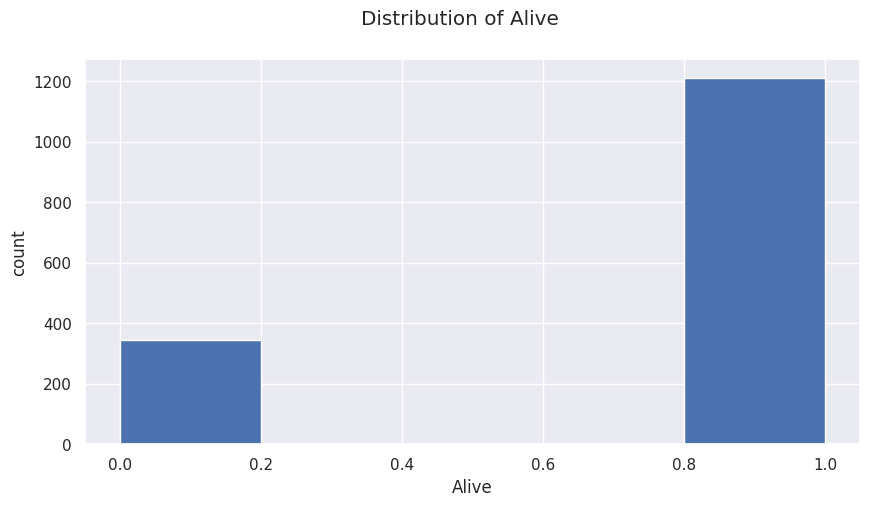

In [ ]:
plt.figure(figsize = (10, 5))

df['isAlive'].hist(density=False, bins=5)
plt.ylabel('count')
plt.xlabel('Alive')

plt.suptitle('Distribution of Alive')
plt.show()

Имеется дисбаланс классов. Класс 1 в несколько раз превышает класс 0. С дисбалансом классов можно бороться, используя oversampling или undersampling. Однако я попробую работать с несбалансированными классами.

**1.7.** Анализ признаков.
  * Обработка категориальных признаков и их кодировка.
  * Анализ количественных признаков и корреляции между ними

In [ ]:
# применим one hot кодирование к столбцу title
one_hot = pd.get_dummies(df['title'])

df = pd.concat([df, one_hot], axis=1)

df = df.drop('title', axis=1)

one_hot = pd.get_dummies(dfTest['title'])

dfTest = pd.concat([dfTest, one_hot], axis=1)

dfTest = dfTest.drop('title', axis=1)

Для признака house сделаем кодировку по рангу дома, ранг будет возрастать с увеличением важности дома.

In [ ]:
category_ranking = {
    'Else': 0,
    'Not important house': 1,
    'Organization or brotherhood': 2,
    'Less important house': 3,
    'Great house': 4
}

df['house_encoded'] = df['house'].map(category_ranking)
dfTest['house_encoded'] = dfTest['house'].map(category_ranking)
df = df.drop('house', axis=1)
dfTest = dfTest.drop('house', axis=1)

In [ ]:
df.loc[(df.house_encoded.isna()),'house_encoded'] = 0
dfTest.loc[(dfTest.house_encoded.isna()),'house_encoded'] = 0

In [ ]:
# Категорию будем заменять средним значением выживших в этой категории
alive_in_category = df.groupby('culture')['isAlive'].mean()

df['culture_encoded'] = df['culture'].map(alive_in_category)
dfTest['culture_encoded'] = dfTest['culture'].map(alive_in_category)

In [ ]:
df.drop(columns=['culture'], inplace = True)
dfTest.drop(columns=['culture'], inplace = True)

Анализ корреляции между признаками при помощи матрицы корреляций

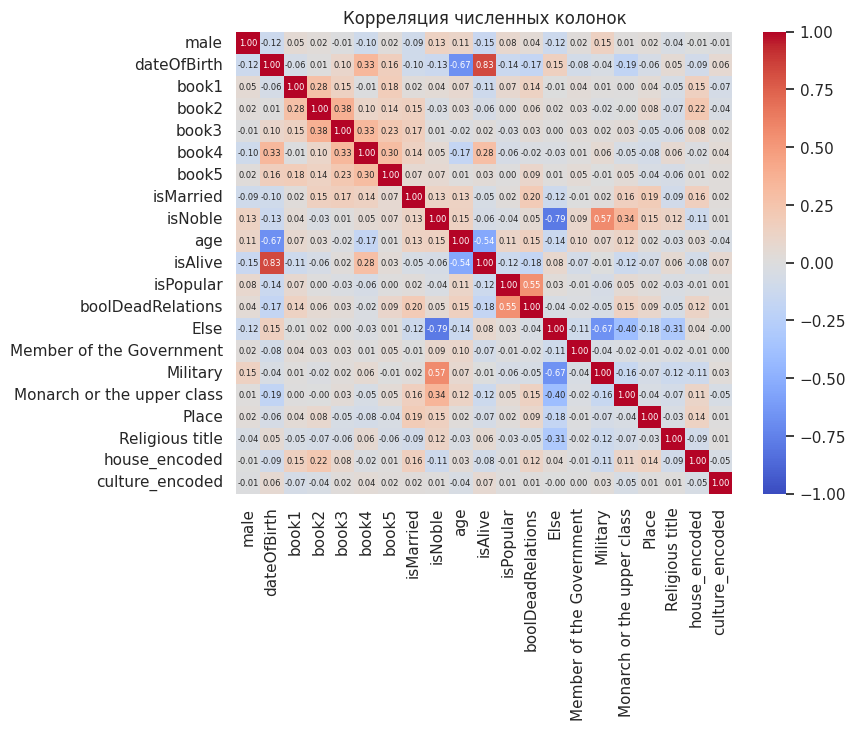

In [ ]:
numeric_columns = df.select_dtypes(include=['number', 'bool']).columns.tolist()
correlation_matrix = df[numeric_columns].corr()

corr_target = correlation_matrix[['isAlive']]

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    fmt=".2f",
    annot_kws={"size": 6}
)
plt.title('Корреляция численных колонок')
plt.show()

Из матрицы корреляций видно, что наибольшую корреляцию имеют признаки dateOfBirth и age, что логично. А также столбец Else и столбец isNoble. Напомню, что в колонке Else отмечены люди титул, которых не относится к самым известным титулам, заданным в списке groups_of_titles. Удалим столбец Else, чтобы убрать линейную зависимость между этими признаками. Удалить его мы можем, при этом наш one hot вектор всё так же однозначно будет определять титул.

In [ ]:
df.drop(columns=['Else'], inplace = True)
dfTest.drop(columns=['Else'], inplace = True)

**1.8.** Анализ влияния признаков на целевую переменную.

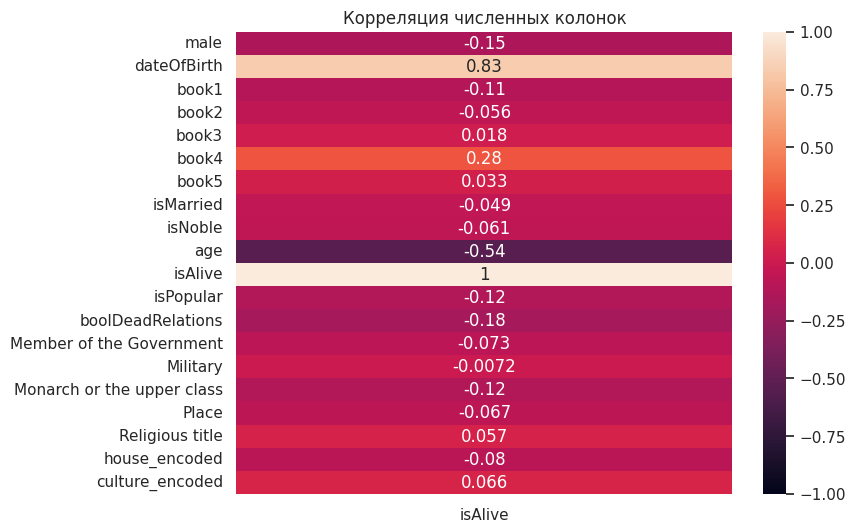

In [ ]:
numeric_columns = df.select_dtypes(include=['number', 'bool']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number', 'bool']).columns.tolist()

correlation_matrix = df[numeric_columns].corr()

corr_target = correlation_matrix[['isAlive']]

plt.figure(figsize=(8,6))
sns.heatmap(corr_target, annot=True, vmin=-1, vmax=1)
plt.title('Корреляция численных колонок')
plt.show()

Как видно, наибольшую корреляцию с целевой переменной имеет признак dateOfBirth, 0.83

Построим круговые диаграммы, чтобы наглядно отобразить, как распределяется значение isAlive в зависимости от значения различных признаков.

In [ ]:
features = ['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations']

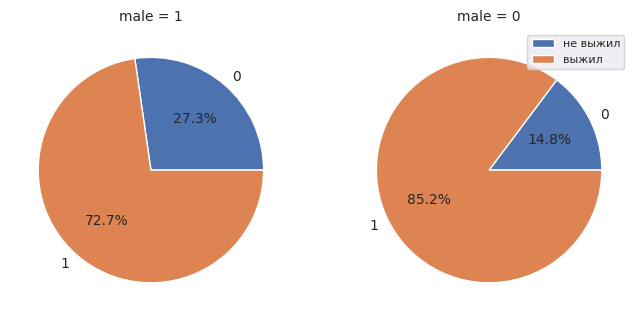

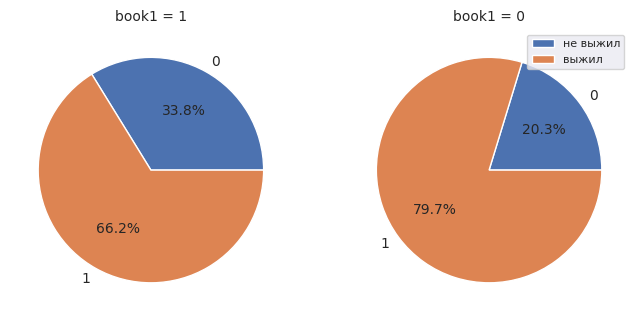

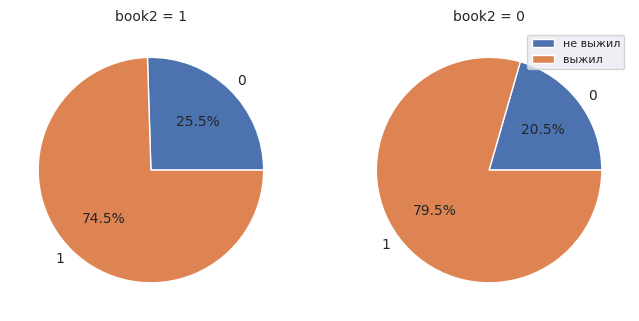

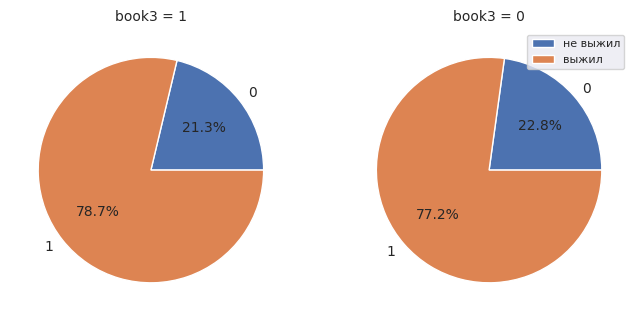

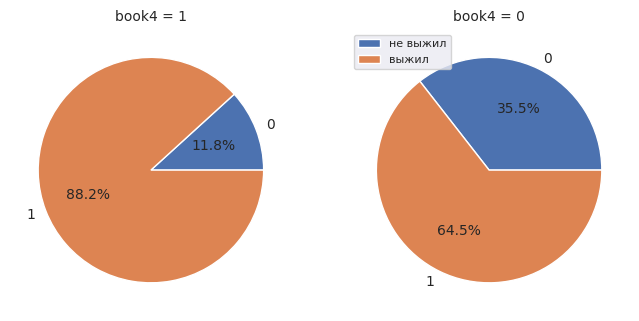

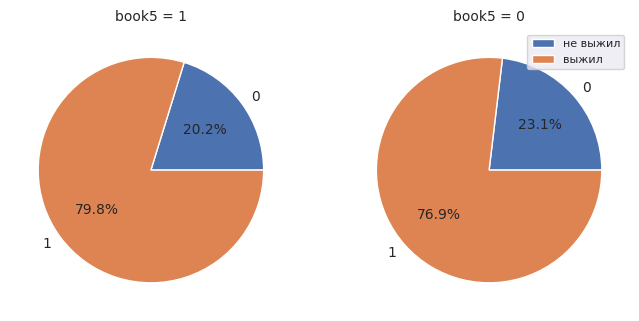

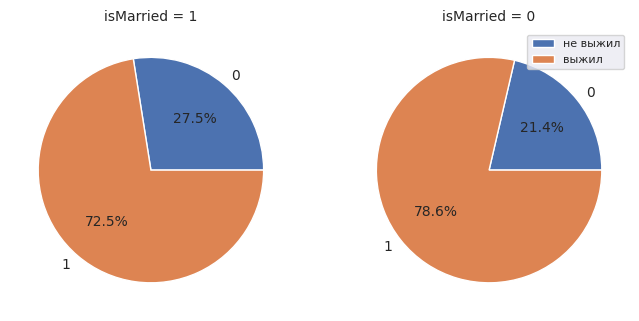

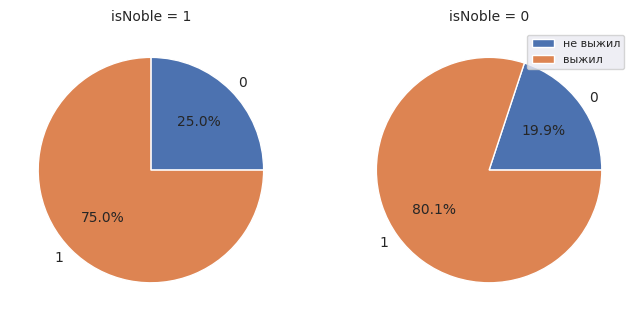

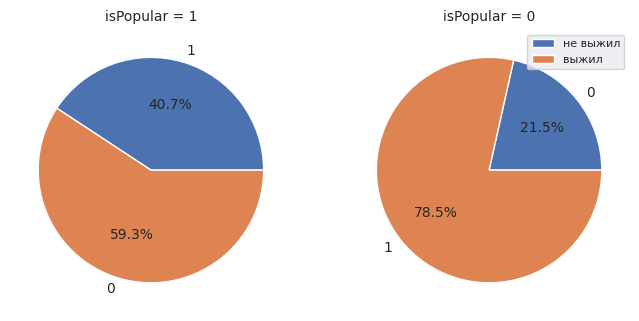

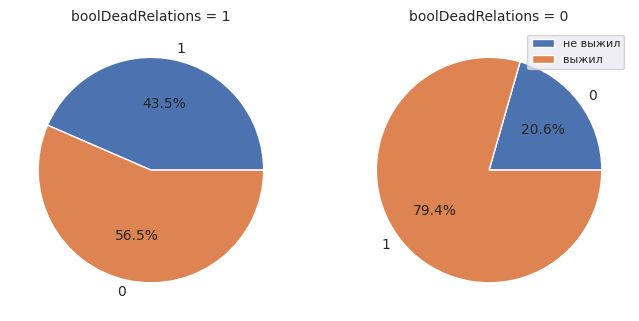

In [ ]:
data = df['isAlive'].value_counts()
# Строим круговую диаграмму
for i in range(len(features)):
  data_1 = df[df[features[i]] == 1]['isAlive'].value_counts().sort_values()
  data_2 = df[df[features[i]] == 0]['isAlive'].value_counts().sort_values()

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

  ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
  ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

  ax1.set_title(f'{features[i]} = 1', fontsize=10)
  ax2.set_title(f'{features[i]} = 0', fontsize=10)

  plt.legend(['не выжил', 'выжил'], fontsize=8)

  plt.show()

**1.9.** Создам переменную `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = df.drop(['isAlive'], axis=1)
y = df['isAlive']

**1.10.** Разбиение датасета на train и test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 42)

## Часть 2. Обучение моделей

В данном разделе я буду обучать на задачу бинарной классификации следующие модели `sklearn`:

* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


**1.1** Импорт моделей

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**2.2.** Обучение моделей

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(max_iter=2000, penalty = 'l2', C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=2000)

In [ ]:
# Шаг 1. создание модели
ada_boost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Шаг 2. обучение модели

ada_boost_classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
# Шаг 1. создание модели
random_forest_classifier = RandomForestClassifier(random_state = 42)

# Шаг 2. обучение модели

random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Шаг 1. создание модели
gaussian_process_classifier = GaussianProcessClassifier(random_state = 42)

# Шаг 2. обучение модели

gaussian_process_classifier.fit(X_train, y_train)

GaussianProcessClassifier(random_state=42)

In [ ]:
# Шаг 1. создание модели
gaussian_nb = GaussianNB()

# Шаг 2. обучение модели
gaussian_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Шаг 1. создание модели
knn = KNeighborsClassifier()

# Шаг 2. обучение модели
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Шаг 1. создание модели
svc = SVC()

# Шаг 2. обучение модели
svc.fit(X_train, y_train)

SVC()

In [ ]:
# Шаг 1. создание модели
decision_tree_classifier = DecisionTreeClassifier()

# Шаг 2. обучение модели
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

## Часть 3 Оценка качества моделей

Оценим все модели и выберем лучшую по метрике качества Accuracy.


**3.1.** Предсказание на тестовых данных и подсчёт метрики Accuracy

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"logistic regression accuracy {accuracy:.6f}")

logistic regression accuracy 1.000000


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = ada_boost_classifier.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"ada boost classifier accuracy {accuracy:.6f}")

ada boost classifier accuracy 0.983974


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = random_forest_classifier.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Random forest classifier accuracy {accuracy:.6f}")

Random forest classifier accuracy 0.977564


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = gaussian_process_classifier.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"gaussian process classifier accuracy {accuracy:.6f}")

gaussian process classifier accuracy 0.996795


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = gaussian_nb.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"gaussian nb accuracy {accuracy:.6f}")

gaussian nb accuracy 0.900641


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = knn.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"knn classifier accuracy {accuracy:.6f}")

knn classifier accuracy 0.990385


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = svc.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"svc accuracy {accuracy:.6f}")

svc accuracy 0.932692


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = decision_tree_classifier.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"decision tree classifier accuracy {accuracy:.6f}")

decision tree classifier accuracy 0.990385


**Итог:** наилучший accuracy даёт модель логистической регрессии, accuracy = 1

In [ ]:
model = logistic_regression

In [ ]:
test_pred = model.predict(dfTest)
print(f'Predictions class 1: {test_pred.sum()}')
print(f'size of test dataset: {len(test_pred)}')

Predictions class 1: 216
size of test dataset: 389


# Прогноз на тестовых данных

### Файл `submission.csv`

Вместо значений в `submission.csv` файле в колонке `isAlive`, подставим свои предсказания и сохраним измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 10.8MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission['isAlive'] = model.predict(dfTest)

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)